In [1]:
import cv2 as cv
import matplotlib.pylab as plt
import xmltodict
import glob
import json

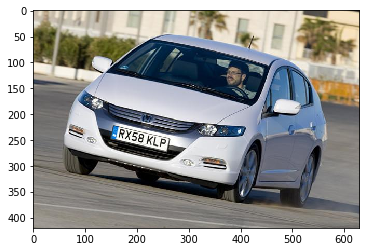

In [27]:
# Load image
img = cv.imread('../../Downloads/openlogo/JPEGImages/hondaimg000243.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [35]:
files = glob.glob('../../Downloads/openlogo/Annotations/*.xml')
print(len(files), files[0])

26898 ../../Downloads/openlogo/Annotations/lexusimg000155.xml


In [36]:
cnt = 0
for fname in files :
    with open(fname) as fd :
        doc = xmltodict.parse(fd.read())
    size = doc['annotation']['size']
    try :
        bbx = doc['annotation']['object']['bndbox']
    except :
        bbx = doc['annotation']['object'][1]['bndbox']
    x = (int(bbx['xmin']) + int(bbx['xmax']))/2./int(size['width'])
    y = (int(bbx['ymin']) + int(bbx['ymax']))/2./int(size['height'])
    w = (int(bbx['xmax']) - int(bbx['xmin']))/int(size['width'])
    h = (int(bbx['ymax']) - int(bbx['ymin']))/int(size['height'])
    if (w<=0.2 and h<=0.2) :
        savename = fname.replace('.xml', '.txt').replace('Annotations/', 'AnnotationsYOLO/')
        with open(savename, 'w') as fd :
            fd.write(f"0\t{x}\t{y}\t{w}\t{h}")
    else :
        cnt += 1

In [37]:
cnt

10723

In [44]:
import os
import tqdm
import numpy as np

os.chdir("/home/idl/Downloads/openlogo/JPEGImages/")

txts = glob.glob("*.txt")
txt_names = [txt[:-4] for txt in txts]

imgs = glob.glob("*.jpg")
img_names = [img[:-4] for img in imgs]

main_list = np.setdiff1d(img_names, txt_names)
for ii in tqdm.tqdm(range(len(main_list))) :
    img = main_list[ii]
    dels = f"/home/idl/Downloads/openlogo/JPEGImages/{img}.jpg"
    !rm {dels}

100%|██████████| 11749/11749 [23:16<00:00,  8.32it/s]


In [75]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

In [86]:
classes = np.sort(glob.glob("/home/idl/Downloads/openlogo/ImageSets/class_sep/*.txt"))

txts = glob.glob("/home/idl/Downloads/openlogo/JPEGImages/*.txt")
txt_names = [txt[40:-4] for txt in txts]

dicc = {}
for ii in tqdm.tqdm(range(0, len(classes), 2)) :
    fnames = []
    with open(classes[ii+1], 'r') as fd :
        while True:
            line = fd.readline()
            if not line:
                break
            fnames.append(line.rstrip())
    with open(classes[ii], 'r') as fd :
        while True:
            line = fd.readline()
            if not line:
                break
            fnames.append(line.rstrip())
    all_files = intersection(fnames, txt_names)
    dicc[classes[ii][49:-9]] = len(all_files)
    

100%|██████████| 354/354 [00:12<00:00, 29.14it/s] 


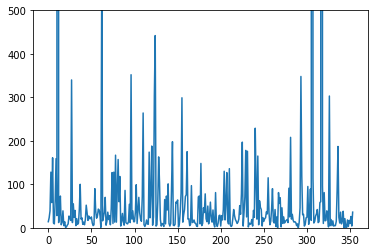

In [92]:
cnt_lst = [dicc[key] for key in dicc.keys()]
plt.plot(cnt_lst)
plt.ylim([0,500])
plt.show()

In [24]:
print(len(dicc.keys()))
print(dicc)

In [4]:
import random
import tqdm

# txts = glob.glob("/home/idl/Downloads/openlogo/JPEGImages/*.txt")
# txt_names = [txt[40:-4] for txt in txts]
# random.shuffle(txt_names)

# test_size = int(len(txt_names)*0.1)

test_list = txt_names[test_size:2*test_size]
for ii in tqdm.tqdm(range(len(test_list))) :
    img = test_list[ii]
    fname = f"/home/idl/Downloads/openlogo/JPEGImages/{img}.jpg"
    dest = f"/home/idl/Downloads/openlogo/valid-logo/{img}.jpg"
    !mv {fname} {dest}
    
    fname = f"/home/idl/Downloads/openlogo/JPEGImages/{img}.txt"
    dest = f"/home/idl/Downloads/openlogo/valid-logo/{img}.txt"
    !mv {fname} {dest}

100%|██████████| 1617/1617 [06:29<00:00,  4.23it/s]


In [22]:
imgs = glob.glob("/home/idl/Documents/yolov5/data/val-logo/*.jpg")
img_names = [img for img in imgs]
with open('/home/idl/Documents/yolov5/data/val-logo.txt', 'w') as fd:
    for item in img_names :
        fd.write(f"{item}\n")

In [18]:
imgs = glob.glob("/home/idl/Downloads/yolov5/data/image/train/*.jpg")
img_names = [img for img in imgs]
with open('/home/idl/Downloads/yolov5/data/train-el.txt', 'w') as fd:
    for item in img_names :
        fd.write(f"{item}\n")